In [1]:
import cv2
from sklearn.model_selection import train_test_split
import glob
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
# for not showing the tensorflow execution message
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3" 

In [12]:
def load_data(road):
    data_list= []
    labels=[]
    for i,address in enumerate(glob.glob(road+"/*/*")):
            try:
                img = cv2.imread(address)
                img = cv2.resize(img,(32,32))
                img_r=img/255
                img_r = img_r.flatten()#Layers.flatten()           
                data_list.append(img_r)
                label = address.split("/")[-1].split(".")[0].split("_")[0]
                labels.append(label)
                if i%100 == 0:
                    print("statue: {}/1500 processed".format(i))
            except:
                print("Error")
                continue

    data_list=np.array(data_list)

    le = LabelEncoder()
    labels = le.fit_transform(labels)

    labels = to_categorical(labels)

    x_train,x_test,y_train,y_test=train_test_split(data_list,labels,test_size=0.2,random_state=0)
    return x_train,x_test,y_train,y_test

In [15]:
def Defining_model(x_train,x_test,y_train,y_test):
    net = models.Sequential([#Layers.flatten(),
                             layers.Dense(300,activation="relu",input_dim=3072),
                             layers.Dense(40,activation="relu"),
                             layers.Dense(2,activation="softmax"),
                            ])
    
    net.compile(optimizer="SGD",
            loss = "categorical_crossentropy",#"spars_categorical_crossentropy" no need to one hot
            metrics=["accuracy"])
    
    res = net.fit(x_train,y_train,batch_size=32,validation_data=(x_test,y_test),epochs=10)
    
    print("\nKeys of resault:\n",res.history.keys(),"\n")
    
    print(net.summary())
    
    return net,res

In [4]:
def plotting(res,strr):
    plt.plot(res.history[strr],label= strr+" Train")
    plt.plot(res.history["val_"+strr],label= strr+" Validation")
    plt.title(strr+" Charts")
    plt.xlabel("epochs")
    plt.ylabel(strr)
    plt.legend()
    plt.show()

In [28]:
def testing(model,road):
    img = cv2.imread(road)
    img = cv2.resize(img,(32,32))
    img_r=img/255
    img_r = img_r.flatten()
    img_r = np.array([img_r]) #We gave it Batch in training, so We don't give it array in testing!
    out = np.argmax(model.predict(img_r)[0])
    names = ["fire","non fire"]
    return names[out]

In [16]:
x_train,x_test,y_train,y_test = load_data("/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training")

statue: 0/1500 processed
statue: 100/1500 processed
statue: 200/1500 processed
statue: 300/1500 processed
statue: 400/1500 processed
statue: 500/1500 processed
statue: 600/1500 processed
statue: 700/1500 processed
statue: 800/1500 processed
statue: 900/1500 processed
statue: 1000/1500 processed
statue: 1100/1500 processed
statue: 1200/1500 processed
statue: 1300/1500 processed
statue: 1400/1500 processed
statue: 1500/1500 processed


In [17]:
net,res = Defining_model(x_train,x_test,y_train,y_test)

Epoch 1/10
38/38 [==============================] - 1s 10ms/step - loss: 0.4130 - accuracy: 0.8133 - val_loss: 0.2718 - val_accuracy: 0.9046
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 0.2637 - accuracy: 0.8964 - val_loss: 0.2355 - val_accuracy: 0.9079
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2398 - accuracy: 0.9046 - val_loss: 0.2193 - val_accuracy: 0.9046
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2241 - accuracy: 0.9186 - val_loss: 0.2128 - val_accuracy: 0.9243
Epoch 5/10
38/38 [==============================] - 0s 5ms/step - loss: 0.1869 - accuracy: 0.9285 - val_loss: 0.2047 - val_accuracy: 0.9276
Epoch 6/10
38/38 [==============================] - 0s 5ms/step - loss: 0.1911 - accuracy: 0.9252 - val_loss: 0.1567 - val_accuracy: 0.9539
Epoch 7/10
38/38 [==============================] - 0s 5ms/step - loss: 0.1749 - accuracy: 0.9334 - val_loss: 0.1681 - val_accuracy: 0.9342
Epoch 8/10
38/38 [=

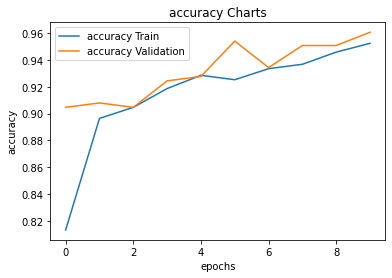

In [22]:
plotting(res,"accuracy")

In [11]:
net.save("mlp.h5")
model = models.load_model(r"/kaggle/working/mlp.h5")

In [30]:
out = testing(net,"/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Testing/fire_0224.jpg")
print(out)

fire
